In [2]:
from __future__ import print_function

import sklearn 
#Import all of the scikit learn stuff

from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans

In [3]:
import pandas as pd 
import warnings
#Suppress warnings from pandas library
warnings.filterwarnings("ignore",category=DeprecationWarning,module="pandas", lineno=570)


In [14]:
import numpy

example = ["prezados senhores informamos diversas bases pgmbox apresentam erro backup dia", 
           "prezados senhores informamos ocorreu travamento servico spj servidor flnsrvunj atendido base spjmga incidente resolvido prontamente reduzindo indisponibilidade", 
           "prezados analise identificamos erro mensagem abaixo sendo principal fator indisponibilidade aplicacoes pgm net dessa forma encaminho ocorrido equipe dba verificacao erro nao possivel conectar servidor aplicacao nao conectado oracle ora att", 
           "sistema nao conectando toda procuradoria sajat rotina automatica nome hebert giesteira celular erro jan doc", 
           "ambiente producao spj flnsrvunj nome usuario regiane chaves melo login usuario pr chefia gerencia tributaria lotacao geat hs descricao acessar fila digitalizar insercao pecas processo apresentada mensagem consta video anexo nao sendo feita tentativa associar movimentacao clicar botao nova peca mensagem sugerindo impede pecas digitalizadas processo apenas cadastrado nao alimentado documentos visualizacao pasta digital anexo video comprova fato autoscreenrecorder jan avi", 
           "ambiente producao spj srvpgesp app chefia procuradoria pr seccional diadema procuradoria seccional diadema alyne basilio assis abassis nome telefone analista vitor figueiredo oliveira poderiam verificar gentileza pois desde cadastro processo nao nenhum intimacao pge net constando historico processo portal principalmente publicacao dia petws intimacoes", 
           "mapear evolucoes produto versoes identificar pode ter utilidade impacta pgmman preparar repasse cliente identificado",
           "prezados senhores informamos servidor flnsrvunj apresenta alto consumo memoria incidente resolvido prontamente reduzindo indisponibilidade",
           "suporte saj ambiente producao daniel arevalo nunes cunha dncunha lotacao gabinete dr daniel arevalo nunes cunha spj srvpgesp app procurador dr daniel usuarios sap pj infrorma nao sendo possivel acessar visualizar link fluxo trabalho obs configuracoes adm ok favor verificar att bruno thiago processos fluxo trabalho chefia fluxo jpg"]


In [15]:
vectorizer = CountVectorizer(min_df=1,stop_words='english')

dtm = vectorizer.fit_transform(example)

pd.DataFrame(dtm.toarray(),index=example,columns=vectorizer.get_feature_names()).head(10)


,abaixo,abassis,acessar,adm,alimentado,alto,alyne,ambiente,analise,analista,...,usuario,usuarios,utilidade,verificacao,verificar,versoes,video,visualizacao,visualizar,vitor
prezados senhores informamos diversas bases pgmbox apresentam erro backup dia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
prezados senhores informamos ocorreu travamento servico spj servidor flnsrvunj atendido base spjmga incidente resolvido prontamente reduzindo indisponibilidade,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
prezados analise identificamos erro mensagem abaixo sendo principal fator indisponibilidade aplicacoes pgm net dessa forma encaminho ocorrido equipe dba verificacao erro nao possivel conectar servidor aplicacao nao conectado oracle ora att,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
sistema nao conectando toda procuradoria sajat rotina automatica nome hebert giesteira celular erro jan doc,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ambiente producao spj flnsrvunj nome usuario regiane chaves melo login usuario pr chefia gerencia tributaria lotacao geat hs descricao acessar fila digitalizar insercao pecas processo apresentada mensagem consta video anexo nao sendo feita tentativa associar movimentacao clicar botao nova peca mensagem sugerindo impede pecas digitalizadas processo apenas cadastrado nao alimentado documentos visualizacao pasta digital anexo video comprova fato autoscreenrecorder jan avi,0,0,1,0,1,0,0,1,0,0,...,2,0,0,0,0,0,2,1,0,0
ambiente producao spj srvpgesp app chefia procuradoria pr seccional diadema procuradoria seccional diadema alyne basilio assis abassis nome telefone analista vitor figueiredo oliveira poderiam verificar gentileza pois desde cadastro processo nao nenhum intimacao pge net constando historico processo portal principalmente publicacao dia petws intimacoes,0,1,0,0,0,0,1,1,0,1,...,0,0,0,0,1,0,0,0,0,1
mapear evolucoes produto versoes identificar pode ter utilidade impacta pgmman preparar repasse cliente identificado,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
prezados senhores informamos servidor flnsrvunj apresenta alto consumo memoria incidente resolvido prontamente reduzindo indisponibilidade,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
suporte saj ambiente producao daniel arevalo nunes cunha dncunha lotacao gabinete dr daniel arevalo nunes cunha spj srvpgesp app procurador dr daniel usuarios sap pj infrorma nao sendo possivel acessar visualizar link fluxo trabalho obs configuracoes adm ok favor verificar att bruno thiago processos fluxo trabalho chefia fluxo jpg,0,0,1,1,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0


In [16]:
#Get words that correspond to each column
vectorizer.get_feature_names()


['abaixo',
 'abassis',
 'acessar',
 'adm',
 'alimentado',
 'alto',
 'alyne',
 'ambiente',
 'analise',
 'analista',
 'anexo',
 'apenas',
 'aplicacao',
 'aplicacoes',
 'app',
 'apresenta',
 'apresentada',
 'apresentam',
 'arevalo',
 'assis',
 'associar',
 'atendido',
 'att',
 'automatica',
 'autoscreenrecorder',
 'avi',
 'backup',
 'base',
 'bases',
 'basilio',
 'botao',
 'bruno',
 'cadastrado',
 'cadastro',
 'celular',
 'chaves',
 'chefia',
 'clicar',
 'cliente',
 'comprova',
 'conectado',
 'conectando',
 'conectar',
 'configuracoes',
 'consta',
 'constando',
 'consumo',
 'cunha',
 'daniel',
 'dba',
 'descricao',
 'desde',
 'dessa',
 'dia',
 'diadema',
 'digital',
 'digitalizadas',
 'digitalizar',
 'diversas',
 'dncunha',
 'doc',
 'documentos',
 'dr',
 'encaminho',
 'equipe',
 'erro',
 'evolucoes',
 'fato',
 'fator',
 'favor',
 'feita',
 'figueiredo',
 'fila',
 'flnsrvunj',
 'fluxo',
 'forma',
 'gabinete',
 'geat',
 'gentileza',
 'gerencia',
 'giesteira',
 'hebert',
 'historico',
 'hs',

In [17]:
lsa = TruncatedSVD(2, algorithm = 'arpack')

dtm = dtm.asfptype()
dtm_lsa = lsa.fit_transform(dtm)

dtm_lsa = Normalizer(copy = False).fit_transform(dtm_lsa)


In [18]:
pd.DataFrame(lsa.components_, index=["component_1", "component_2"], columns=vectorizer.get_feature_names())


,abaixo,abassis,acessar,adm,alimentado,alto,alyne,ambiente,analise,analista,...,usuario,usuarios,utilidade,verificacao,verificar,versoes,video,visualizacao,visualizar,vitor
component_1,0.018107,0.038666,0.134253,0.057730,0.076523,0.002377,0.038666,0.172918,0.018107,0.038666,...,0.153046,0.057730,5.849058e-18,0.018107,0.096395,5.849058e-18,0.153046,0.076523,0.057730,0.038666
component_2,-0.001655,-0.006665,0.029360,0.101675,-0.072315,-0.001898,-0.006665,0.022695,-0.001655,-0.006665,...,-0.144630,0.101675,-3.471268e-17,-0.001655,0.095010,-3.471268e-17,-0.144630,-0.072315,0.101675,-0.006665


In [19]:
pd.DataFrame(dtm_lsa,index=example,columns=["component_1","component_2"])


,component_1,component_2
prezados senhores informamos diversas bases pgmbox apresentam erro backup dia,0.974381,-0.224904
prezados senhores informamos ocorreu travamento servico spj servidor flnsrvunj atendido base spjmga incidente resolvido prontamente reduzindo indisponibilidade,0.970205,-0.242284
prezados analise identificamos erro mensagem abaixo sendo principal fator indisponibilidade aplicacoes pgm net dessa forma encaminho ocorrido equipe dba verificacao erro nao possivel conectar servidor aplicacao nao conectado oracle ora att,0.997902,-0.064749
sistema nao conectando toda procuradoria sajat rotina automatica nome hebert giesteira celular erro jan doc,0.926261,-0.376882
ambiente producao spj flnsrvunj nome usuario regiane chaves melo login usuario pr chefia gerencia tributaria lotacao geat hs descricao acessar fila digitalizar insercao pecas processo apresentada mensagem consta video anexo nao sendo feita tentativa associar movimentacao clicar botao nova peca mensagem sugerindo impede pecas digitalizadas processo apenas cadastrado nao alimentado documentos visualizacao pasta digital anexo video comprova fato autoscreenrecorder jan avi,0.830475,-0.557056
ambiente producao spj srvpgesp app chefia procuradoria pr seccional diadema procuradoria seccional diadema alyne basilio assis abassis nome telefone analista vitor figueiredo oliveira poderiam verificar gentileza pois desde cadastro processo nao nenhum intimacao pge net constando historico processo portal principalmente publicacao dia petws intimacoes,0.992598,-0.121446
mapear evolucoes produto versoes identificar pode ter utilidade impacta pgmman preparar repasse cliente identificado,0.230971,-0.972961
prezados senhores informamos servidor flnsrvunj apresenta alto consumo memoria incidente resolvido prontamente reduzindo indisponibilidade,0.870062,-0.492941
suporte saj ambiente producao daniel arevalo nunes cunha dncunha lotacao gabinete dr daniel arevalo nunes cunha spj srvpgesp app procurador dr daniel usuarios sap pj infrorma nao sendo possivel acessar visualizar link fluxo trabalho obs configuracoes adm ok favor verificar att bruno thiago processos fluxo trabalho chefia fluxo jpg,0.624657,0.780899


In [20]:
xs = [w[0] for w in dtm_lsa]
ys = [w[1] for w in dtm_lsa]
xs, ys

([0.9743810365189406,
  0.9702054241383831,
  0.9979016103221917,
  0.9262611485419955,
  0.8304746467932499,
  0.9925980547926201,
  0.23097103075495268,
  0.8700624914933807,
  0.624657000811878],
 [-0.22490352525533,
  -0.24228379015621354,
  -0.06474856072822315,
  -0.3768823220869657,
  -0.557056425358892,
  -0.1214458793945136,
  -0.9729606276473857,
  -0.49294143759307846,
  0.7808992453170314])

Populating the interactive namespace from numpy and matplotlib


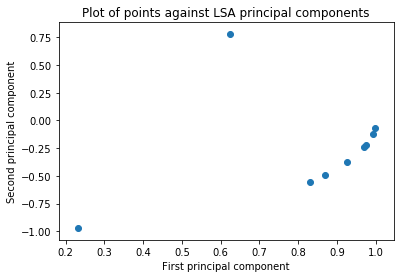

In [21]:
#Plot scatter plot of points
%pylab inline

import matplotlib.pyplot as plt

figure()

plt.scatter(xs,ys)
xlabel('First principal component')
ylabel('Second principal component')

title('Plot of points against LSA principal components')
show()

Populating the interactive namespace from numpy and matplotlib


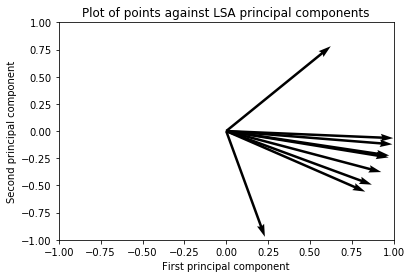

In [22]:
#Plot scatter plot of points with vectors
%pylab inline
import matplotlib.pyplot as plt
plt.figure()
ax = plt.gca()
ax.quiver(0,0,xs,ys,angles='xy',scale_units='xy',scale=1,linewidth=.01)
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
xlabel('First principal component')
ylabel('Second principal component')

title('Plot of points against LSA principal components')
plt.draw()
plt.show()

In [23]:
similarity = np.asarray(numpy.asmatrix(dtm_lsa)*numpy.asmatrix(dtm_lsa).T)
pd.DataFrame(similarity,index=example,columns=example).head(10)


,prezados senhores informamos diversas bases pgmbox apresentam erro backup dia,prezados senhores informamos ocorreu travamento servico spj servidor flnsrvunj atendido base spjmga incidente resolvido prontamente reduzindo indisponibilidade,prezados analise identificamos erro mensagem abaixo sendo principal fator indisponibilidade aplicacoes pgm net dessa forma encaminho ocorrido equipe dba verificacao erro nao possivel conectar servidor aplicacao nao conectado oracle ora att,sistema nao conectando toda procuradoria sajat rotina automatica nome hebert giesteira celular erro jan doc,ambiente producao spj flnsrvunj nome usuario regiane chaves melo login usuario pr chefia gerencia tributaria lotacao geat hs descricao acessar fila digitalizar insercao pecas processo apresentada mensagem consta video anexo nao sendo feita tentativa associar movimentacao clicar botao nova peca mensagem sugerindo impede pecas digitalizadas processo apenas cadastrado nao alimentado documentos visualizacao pasta digital anexo video comprova fato autoscreenrecorder jan avi,ambiente producao spj srvpgesp app chefia procuradoria pr seccional diadema procuradoria seccional diadema alyne basilio assis abassis nome telefone analista vitor figueiredo oliveira poderiam verificar gentileza pois desde cadastro processo nao nenhum intimacao pge net constando historico processo portal principalmente publicacao dia petws intimacoes,mapear evolucoes produto versoes identificar pode ter utilidade impacta pgmman preparar repasse cliente identificado,prezados senhores informamos servidor flnsrvunj apresenta alto consumo memoria incidente resolvido prontamente reduzindo indisponibilidade,suporte saj ambiente producao daniel arevalo nunes cunha dncunha lotacao gabinete dr daniel arevalo nunes cunha spj srvpgesp app procurador dr daniel usuarios sap pj infrorma nao sendo possivel acessar visualizar link fluxo trabalho obs configuracoes adm ok favor verificar att bruno thiago processos fluxo trabalho chefia fluxo jpg
prezados senhores informamos diversas bases pgmbox apresentam erro backup dia,1.000000,0.999840,0.986899,0.987293,0.934483,0.994482,0.443876,0.958637,0.433027
prezados senhores informamos ocorreu travamento servico spj servidor flnsrvunj atendido base spjmga incidente resolvido prontamente reduzindo indisponibilidade,0.999840,1.000000,0.983857,0.989976,0.940697,0.992448,0.459822,0.963571,0.416846
prezados analise identificamos erro mensagem abaixo sendo principal fator indisponibilidade aplicacoes pgm net dessa forma encaminho ocorrido equipe dba verificacao erro nao possivel conectar servidor aplicacao nao conectado oracle ora att,0.986899,0.983857,1.000000,0.948720,0.864801,0.998379,0.293484,0.900154,0.572784
sistema nao conectando toda procuradoria sajat rotina automatica nome hebert giesteira celular erro jan doc,0.987293,0.989976,0.948720,1.000000,0.979181,0.965176,0.580631,0.991686,0.284288
ambiente producao spj flnsrvunj nome usuario regiane chaves melo login usuario pr chefia gerencia tributaria lotacao geat hs descricao acessar fila digitalizar insercao pecas processo apresentada mensagem consta video anexo nao sendo feita tentativa associar movimentacao clicar botao nova peca mensagem sugerindo impede pecas digitalizadas processo apenas cadastrado nao alimentado documentos visualizacao pasta digital anexo video comprova fato autoscreenrecorder jan avi,0.934483,0.940697,0.864801,0.979181,1.000000,0.891980,0.733810,0.997161,0.083757
ambiente producao spj srvpgesp app chefia procuradoria pr seccional diadema procuradoria seccional diadema alyne basilio assis abassis nome telefone analista vitor figueiredo oliveira poderiam verificar gentileza pois desde cadastro processo nao nenhum intimacao pge net constando historico processo portal principalmente publicacao dia petws intimacoes,0.994482,0.992448,0.998379,0.965176,0.891980,1.000000,0.347423,0.923488,0.525196
mapear evolucoes produto versoes identificar pode ter utilidade impacta pgmman preparar repasse 

In [24]:
example = ["prezados senhores informamos ocorreu erro spbalanceador servidor flnsrvunj atendido base spjmga"]

vectorizer = CountVectorizer(min_df=1,stop_words='english')

dtm = vectorizer.fit_transform(example)

pd.DataFrame(dtm.toarray(),index=example,columns=vectorizer.get_feature_names()).head(10)



,atendido,base,erro,flnsrvunj,informamos,ocorreu,prezados,senhores,servidor,spbalanceador,spjmga
prezados senhores informamos ocorreu erro spbalanceador servidor flnsrvunj atendido base spjmga,1,1,1,1,1,1,1,1,1,1,1


In [25]:
lsa = TruncatedSVD(2, algorithm = 'arpack')

dtm = dtm.asfptype()
dtm_lsa = lsa.fit_transform(dtm)

dtm_lsa = Normalizer(copy = False).fit_transform(dtm_lsa)


ValueError: k must be between 1 and min(A.shape), k=2

In [ ]:
similarity = np.asarray(numpy.asmatrix(dtm_lsa)*numpy.asmatrix(dtm_lsa).T)
pd.DataFrame(similarity,index=example,columns=example).head(10)

In [26]:
similarity = np.asarray(numpy.asmatrix(dtm_lsa)*numpy.asmatrix(dtm).T)
pd.DataFrame(similarity,index=example,columns=example).head(10)

ValueError: shapes (9,2) and (1,1) not aligned: 2 (dim 1) != 1 (dim 0)